# (26) mnist fit — ```conv```, iter

**Motivation**: host = ```yoru```, device = ```cuda:1``` <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from base.utils_model import load_quick
from figures.analysis import plot_convergence
from figures.imgs import plot_weights

device_idx = 1
device = f'cuda:{device_idx}'

print(f"device: {device}  ———  host: {os.uname().nodename}")

device: cuda:1  ———  host: yoru

In [3]:
def _eval():
    seq_total = 1 if tr.model.cfg.seq_len == 1 else 1000
    results = tr.analysis('vld', seq_total=seq_total, n_data_batches=10, verbose=False)
    
    fig, axes = plot_convergence(results, color='C0', display=False)
    fig.suptitle(name, fontsize=16, fontfamily='monospace', color='darkgreen', y=1.1)
    display(fig)

In [4]:
dataset = 'MNIST'
model_type = 'poisson'
archi_type = 'jacob|conv'

In [5]:
seq_lengths = [32]
beta_factors = [1/2, 3/8]
looper = itertools.product(
    seq_lengths,
    beta_factors,
)

name: <jacob|conv>_(32,16.0)

poisson_MNIST_t-32_z-[64]_k-32_<jacob|conv>
b200-ep400-lr(0.001)_beta(16:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_27,07:13)

epoch # 400, avg loss: 10.849137: 100%|███| 400/400 [43:13:41<00:00, 389.05s/it]


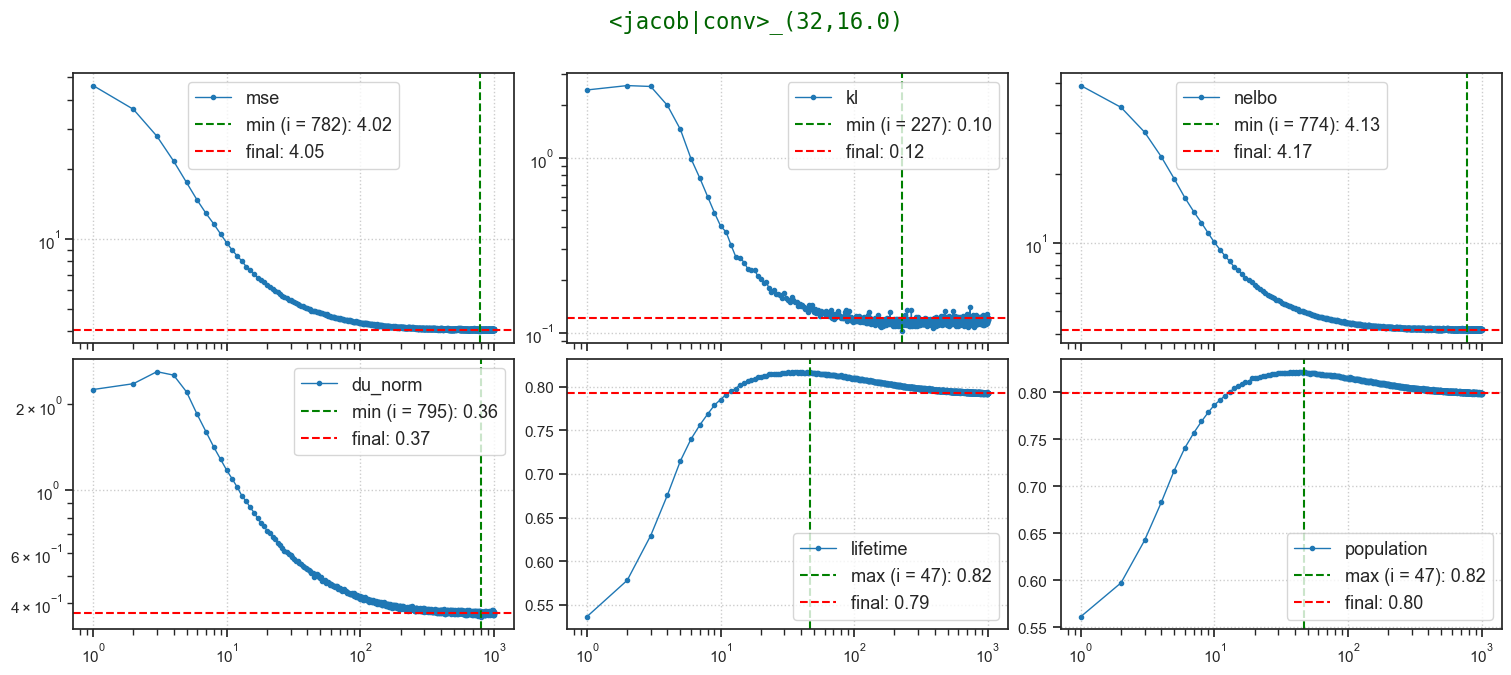

name: <jacob|conv>_(32,12.0)

poisson_MNIST_t-32_z-[64]_k-32_<jacob|conv>
b200-ep400-lr(0.001)_beta(12:0x0.1)_temp(0.05:lin-0.5)_gr(150)_(2024_09_29,02:29)

epoch # 13, avg loss: 9.092267:   3%|▏   | 13/400 [1:23:56<41:30:35, 386.14s/it]

In [ ]:
%%time


for seq_len, factor in looper:
    cfg_vae, cfg_tr = default_configs(
        dataset=dataset,
        model_type=model_type,
        archi_type=archi_type,
    )
    cfg_vae['clamp_prior'] = -4
    cfg_vae['init_scale'] = 1e-4
    cfg_vae['seq_len'] = seq_len
    cfg_tr['kl_beta'] = factor * seq_len
    cfg_tr['warmup_portion'] = 0.01
    cfg_tr['lr'] = 0.001

    vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
    tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

    name = f"<{archi_type}>_({tr.model.cfg.seq_len},{tr.cfg.kl_beta:0.1f})"
    print(f"name: {name}\n\n{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n\n")

    tr.train()

    _eval()

In [ ]:
print(tr.model.layer.dec)

In [ ]:
dataset = 'MNIST'
model_type = 'poisson'
archi_type = 'jacob|conv'

In [ ]:
seq_lengths = [32]
beta_factors = [5/8, 6/8]
looper = itertools.product(
    seq_lengths,
    beta_factors,
)

In [ ]:
%%time


for seq_len, factor in looper:
    cfg_vae, cfg_tr = default_configs(
        dataset=dataset,
        model_type=model_type,
        archi_type=archi_type,
    )
    cfg_vae['clamp_prior'] = -4
    cfg_vae['init_scale'] = 1e-4
    cfg_vae['seq_len'] = seq_len
    cfg_tr['kl_beta'] = factor * seq_len
    cfg_tr['warmup_portion'] = 0.01
    cfg_tr['lr'] = 0.001

    vae = MODEL_CLASSES[model_type](CFG_CLASSES[model_type](**cfg_vae))
    tr = TrainerVAE(vae, ConfigTrainVAE(**cfg_tr), device=device)

    name = f"<{archi_type}>_({tr.model.cfg.seq_len},{tr.cfg.kl_beta:0.1f})"
    print(f"name: {name}\n\n{vae.cfg.name()}\n{tr.cfg.name()}_({vae.timestamp})\n\n")

    tr.train()

    _eval()